In [9]:
# Importovanie knižníc 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support

In [10]:
# Načítanie csv súboru a následne aj jeho vypísanie 
data = pd.read_csv('data.csv', index_col = None)
print('Rozmer súboru údajov : ', data.shape)
print(data.head())

Rozmer súboru údajov :  (569, 33)
         id diagnoza_tkaniv  priemer_vzdialenosti  standardna_odchylka  \
0    842302               M                 17.99                10.38   
1    842517               M                 20.57                17.77   
2  84300903               M                 19.69                21.25   
3  84348301               M                 11.42                20.38   
4  84358402               M                 20.29                14.34   

   priemerna_velkost_nadoru  stredna_plocha  priemer_lokalnej_odchylky  \
0                    122.80          1001.0                    0.11840   
1                    132.90          1326.0                    0.08474   
2                    130.00          1203.0                    0.10960   
3                     77.58           386.1                    0.14250   
4                    135.10          1297.0                    0.10030   

   stredna_kompaktnost  priemer_konkavnych_casti  pocet_konkavnych_casti  \


In [11]:
# Odstránenie prázdneho stĺpca zo súboru údajov, pretože je zbytočný a nepoužiteľný
del data['Unnamed: 32']
# Výpis vymazaných stlpcov
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                                 569 non-null int64
diagnoza_tkaniv                    569 non-null object
priemer_vzdialenosti               569 non-null float64
standardna_odchylka                569 non-null float64
priemerna_velkost_nadoru           569 non-null float64
stredna_plocha                     569 non-null float64
priemer_lokalnej_odchylky          569 non-null float64
stredna_kompaktnost                569 non-null float64
priemer_konkavnych_casti           569 non-null float64
pocet_konkavnych_casti             569 non-null float64
stredova_symetria                  569 non-null float64
priemer_fraktalnej_dimenzie        569 non-null float64
priemer_vzdialenosti_se            569 non-null float64
standardna_odchylka_se             569 non-null float64
priemerna_velkost_nadoru_se        569 non-null float64
stredna_plocha_se                  569 non-null float64
pr

In [12]:
# Oddelenie premenných funkcie a premennej triedy(cieľová premenná)
# Jedna premenná služí na vykonávanie operácii, druha len na zobrazenie údajov
# Cieľové údaje sú diagnóza, ktorá hovorí, či je nádor zhubný alebo benígny.

X = data.iloc[:, 2:].values       # X bude reprezentovať vstupnú vrstvu, dáta, ktoré privádzame do siete.
Y = data.iloc[:, 1].values        # Y bude predstavovať cieľový výstup, ktorý zodpovedá vstupu X, výstup, ktorý by sme mali získať na konci siete, potom, čo vykoná svoje výpočty.
print(X)
print("\n Výpis aktuálnej premennej : ", Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

 Výpis aktuálnej premennej :  ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' '

In [13]:
# Kódovanie triedy, premenej Y, ktorá obsahuje dáta M a B, do binárnej sústavy 1 a 0, je to z dôvodu takého, že stroj vie pracovať len s 1 a 0
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print('Po kodovani : ', Y)

Po kodovani :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0

In [14]:
# Ďalej sa údaje rozdelia na dve sady, tzn. Tréningové a testovacie súbory.
# Dôvodom rozdelenia údajov na tréningové a testovacie súbory je, že nemôžeme trénovať model na celých údajoch, pretože to povedie k preplneniu. To znamená, že model bude dobre fungovať na tréningových dátach a zlyhá na nových neviditeľných dátach (t.j. chyba tréningu je nízka a testovacia chyba je vysoká).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 0)

#Výpis premenných X
print(X_train)
print(X_test)



[[1.149e+01 1.459e+01 7.399e+01 ... 7.431e-02 2.941e-01 9.180e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[[1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 6.005e-02 2.444e-01 6.788e-02]
 [1.402e+01 1.566e+01 8.959e+01 ... 8.216e-02 2.136e-01 6.710e-02]
 ...
 [1.371e+01 1.868e+01 8.873e+01 ... 1.284e-01 2.849e-01 9.031e-02]
 [1.330e+01 2.157e+01 8.524e+01 ... 5.614e-02 2.637e-01 6.658e-02]
 [9.333e+00 2.194e+01 5.901e+01 ... 2.564e-02 2.435e-01 7.393e-02]]


In [15]:
# Zmena mierky našich trénovacích údajov  (škálovanie funkcií)
# Každá funkcia v našom súbore údajov bude mať strednú hodnotu = 0 a štandardnú odchýlku = 1
#  Je to preto, aby všetky hodnoty boli zmenšené tak, aby sa nachádzali v rovnakom rozsahu. Uľahčuje to náš model predvídať a vykonávať rýchlejšie.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Výpis premenných X
print(X_train)
print(X_test)


[[-0.74998027 -1.09978744 -0.74158608 ... -0.6235968   0.07754241
   0.45062841]
 [-1.02821446 -0.1392617  -1.02980434 ... -0.7612376  -1.07145262
  -0.29541379]
 [-0.53852228 -0.29934933 -0.56857428 ... -0.50470441  0.34900827
  -0.13371556]
 ...
 [-1.3214733  -0.20855336 -1.3143845  ... -0.98621857 -0.69108476
  -0.13148524]
 [-1.24245479 -0.23244704 -1.27759928 ... -1.7562754  -1.55125275
  -1.01078909]
 [-0.74441558  1.13188181 -0.72016173 ... -0.28490593 -1.2308599
   0.20083251]]
[[-0.17715788  0.22140254 -0.10696857 ...  1.39677786  1.14404645
   1.44477141]
 [-0.23403396  1.26339611 -0.30309994 ... -0.80720664 -0.82315205
  -0.90738698]
 [ 0.00843776 -0.84922934 -0.06592787 ... -0.47125285 -1.35417496
  -0.9500342 ]
 ...
 [-0.08436006 -0.18393957 -0.10308051 ...  0.23134793 -0.12489141
   0.31899407]
 [-0.20709266  0.45271189 -0.2538511  ... -0.86661774 -0.49040068
  -0.97846568]
 [-1.39460537  0.53422091 -1.38700657 ... -1.33005467 -0.83866895
  -0.57659762]]


1
Chybovosť :  0.0038812214102433634
Presnosť testu :  95.90643274853801 %
------------------------------------
Skutočne negatívny 102
Falošne pozitívný 6
Falošne negatívny 1
Skutočne pozitívny 62
Presnosť testu :  0.9590643274853801
Miera nesprávneho ohodnotenia :  0.04093567251461988
Presnosť :  [0.99029126 0.91176471]
recall :  [0.94444444 0.98412698]
FScore :  [0.96682464 0.94656489]
Podpora :  [108  63]
Sensitivity or TPR :  0.9841269841269841
Specificity or TNR :  0.9444444444444444
False Positive Rate or Fallout :  0.05555555555555555
False Negative Rate :  0.015873015873015872
False Discovery Rate :  0.08823529411764706


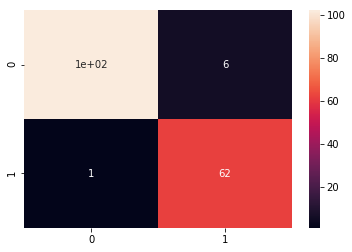

In [23]:
# Vytvorenie neuronovej siete
print(Y[:,None].shape[1])

class NeuralNetwork: #počet funkcií = počtu vstupných uzlov,  30 prvkov 30 uzlov
    def __init__(self, X, Y, X_test, Y_test, hidden_nodes=12, learninig_rate=0.1, epochs=5000):
        # naše dáta
#hidden_notes - počet uzlov v našej skrytej vrstve
#learning_rate - rýchlosť učenie, nastavili sme si ju na nízku hodnotu, je to pomalšie, ale spoľahlivejšie 
# Epocha opisuje, koľkokrát algoritmus vidí celý súbor údajov. Takže zakaždým, keď algoritmus videl všetky vzorky v datasete, epocha je dokončená.
# Jednoducho definuje, koľkokrát sa náš model vyškolí na našom súbore údajov.
        self.X = X
        self.Y = Y[:, None]
        self.X_test = X_test
        self.Y_test = Y_test

        # definovanie parametrov

        np.random.seed(4)
        self.input_nodes = len(X[0])     # počet funkcií v tréningových údajoch
        self.hidden_nodes = hidden_nodes
        self.output_npdes = self.Y.shape[1]
        self.learning_rate = learninig_rate

        # inicializáciu váh pre našu sieť
        #V tomto kroku aplikujeme váhy vrstvy pre zodpovedajúce vstupné uzly. Je to násobenie vstupu a hmotnosti vrstvy.
        #Generovanie je náhodné, používame dve sady váh, jedna ide zo vstupu do skrytej vrsty, druhá zo skrytej do výstupu
        self.w1 = 2 * np.random.random((self.input_nodes, self.hidden_nodes)) - 1  #  12x0  Weight matrix from input to hidden layer
        self.w2 = 2 * np.random.random((self.hidden_nodes, self.output_npdes)) - 1 # 12x0 weight matrix from hidden to output layer

        self.train(epochs)  # Vzhľadom k tomu, že musíme veľakrát trénovať náš model, prejdeme epochami
        self.test()
    # medzi vstupnými a skrytými vrstvami
    # Definovanie aktivačnej funkcie, využíva sa Sigmoid aktivačná funkcia, kvôli tomu, že sa zaoberame binárnou klasifikáciou
    def sigmoid(self, X):
        return (1 / (1 + np.exp(-X)))
    # Tu sa vypočíta derivácia aktuálnej vrstvy pomocou funkcie sigmoidPrime
    def sigmoid_prime(self, X):
        return X * (1 - X)
    
    #trénovanie 
    def train(self, epochs):

        for e in range(epochs):
            # FORWARDPROPAGATION
            l1 = self.sigmoid(np.dot(self.X, self.w1))
            # medzi skrytým a výstupom
            l2 = self.sigmoid(np.dot(l1, self.w2))

            # BACKPROPAGATION
            # Chyba siete (skutočná hodnota - predpokladaná hodnota), Vypočítame rozdiel medzi skutočnou hodnotou a predpokladanou hodnotou.

            error = self.Y - l2

            # Chyba pre každú z vrstiev
            # Nájdeme chybu vo vrstve pomocou derivácie aktuálnej vrstvy vynásobenej chybou predchádzajúcej vrstvy.

            l2_delta = error * self.sigmoid_prime(l2)
            l1_delta = l2_delta.dot(self.w2.T) * self.sigmoid_prime(l1)

            self.w2 = np.add(self.w2, l1.T.dot(l2_delta) * self.learning_rate)
            self.w1 = np.add(self.w1, self.X.T.dot(l1_delta) * self.learning_rate)

        print('Chybovosť : ', (abs(error)).mean())
        
  # testovanie a vyhodnotenie
 # Takže tu otestujeme výkonnosť modelu tým, že prejdeme cez inú vzorku, ktorá nie je súčasťou tréningových dát nazývaných aj testovací súbor.
#Táto testovacia množina sa používa na testovanie výkonu modelu pri zovšeobecňovaní neviditeľných údajov a počtu správnych predpovedí vykonaných porovnaním so skutočnými štítkami triedy.

    def test(self):
        correct = 0
        pred_list = []
        l1 = self.sigmoid(np.dot(self.X_test, self.w1))
        l2 = self.sigmoid(np.dot(l1, self.w2))

        for i in range(len(l2)):
            if l2[i] >= 0.5:
                pred = 1
            else:
                pred = 0

            if pred == self.Y_test[i]:
                correct += 1

            pred_list.append(pred)

        print('Presnosť testu : ', ((correct / len(Y_test)) * 100), '%')



        precision, recall,fscore, support =  precision_recall_fscore_support(Y_test, pred_list, average=None)
        print('------------------------------------')
         #V tejto časti robíme výpisi, resp. výstup programu
        tn, fp, fn, tp = confusion_matrix(Y_test, pred_list).ravel()
        print('Skutočne negatívny', tn) # žiadný známy zhubný nádor, alebo prednádorové ložisko nebolo zistené 
        print('Falošne pozitívný', fp) # zhubný nádor, alebo prednádorové ložisko neboli zistené behom daného obdobia
        print('Falošne negatívny', fn) # zhubný nádor, alebo prednádorové ložisko sú zistené behom daného obdobia
        print('Skutočne pozitívny', tp) # zhubný nádor bol zistený po abnormálnom výsledku 

        total = tn + tp + fn + fp
        print('Presnosť testu : ', (tn + tp)/total)
        print('Miera nesprávneho ohodnotenia : ', (fn + fp)/total)
        print('Presnosť : ', precision)
        print('recall : ', recall)
        print('FScore : ', fscore)
        print('Podpora : ', support)
        print('Sensitivity or TPR : ', (tp/ (tp + fn)) )
        print('Specificity or TNR : ', (tn/(tn+fp)))
        print('False Positive Rate or Fallout : ', (fp/(fp+tn)))
        print('False Negative Rate : ', (fn/(fn+tp)))
        print('False Discovery Rate : ', (fp/(tp+fp)))
      
          
        cm = confusion_matrix(Y_test, pred_list)
        sns.heatmap(cm, annot=True)
        plt.savefig('h.png')
        plt.show()


nn = NeuralNetwork(X_train, Y_train, X_test, Y_test)

       